In [ ]:
# Importation Library

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
! pip install qkeras
from qkeras import *

In [ ]:
# Search data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)


In [ ]:
# Normaliser les pixels
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train = x_train / 255
x_test = x_test / 255

print(x_train[0].shape)

x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

(28, 28)


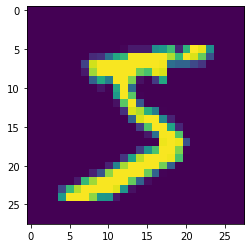

In [ ]:
plt.imshow(x_train[0,:,:,0])

In [ ]:
import numpy as np
from PIL import Image as im
#plt.imshow(x_train[0,:,:,0],cmap = "gray")
data = im.fromarray(x_train[0,:,:,0])
data = data.convert("L")
data.save('gfg_dummy_pic.png')
data.show()
#plt.savefig('Image5.png')

In [ ]:
image = im.fromarray(x_train[0,:,:,0])
image = image.convert("L")
image.save("filename.jpeg")

In [ ]:
# normalize
# Crée CCN
# 1 Conv2D
# 2 Pooling
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.MaxPool2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10))
model.summary()
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")
model.fit(x_train,y_train,epochs=10,validation_split=0.1)
model.evaluate(x_test,y_test)

# Flatten
# Couche dense
# 4 Quantification



Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 activation_17 (Activation)  (None, 26, 26, 32)        0         
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 5408)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________

[0.05614135041832924, 0.9828000068664551]

In [ ]:
model_1= model1 = tf.keras.Sequential()

k = k_= tf.keras.Sequential()
k = k_ = tf.keras.Input((28,28,1))
k = QConv2D(32, (3, 3),
       kernel_quantizer="stochastic_ternary",
        bias_quantizer="ternary")(k)
k = QActivation("quantized_relu(4)")(k)
k = tf.keras.layers.MaxPool2D((2,2))(k)

k = tf.keras.layers.Flatten()(k)
k = QDense(10,
          kernel_quantizer=quantized_bits(4),
          bias_quantizer=quantized_bits(4))(k)
k = QActivation("quantized_bits(20, 5)")(k)
k = Model( inputs=k_ , outputs = k)
k.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")
k.summary()
k.fit(x_train,y_train,epochs=10,validation_split=0.1)
k.evaluate(x_test,y_test)



Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 q_conv2d_45 (QConv2D)       (None, 26, 26, 32)        320       
                                                                 
 q_activation_97 (QActivatio  (None, 26, 26, 32)       0         
 n)                                                              
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 5408)              0         
                                                                 
 q_dense_17 (QDense)         (None, 10)                540

[0.18012067675590515, 0.9520000219345093]

In [ ]:
k.evaluate(x_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.0954 - accuracy: 0.9730


[0.09539094567298889, 0.9729999899864197]

In [ ]:
model.save('model',save_format='tf')

INFO:tensorflow:Assets written to: model/assets


In [ ]:
!pip install tf2onnx

In [ ]:
!python -m tf2onnx.convert --opset 11 --fold_const --saved-model $MODEL/model --output $MODEL.onnx

/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'tf2onnx.convert' found in sys.modules after import of package 'tf2onnx', but prior to execution of 'tf2onnx.convert'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
2022-02-03 15:53:08,784 - WARNING - '--tag' not specified for saved_model. Using --tag serve
Traceback (most recent call last):
  File "/usr/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 633, in <module>
    main()
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/convert.py", line 236, in main
    use_graph_names=args.use_graph_names)
  File "/usr/local/lib/python3.7/dist-packages/tf2onnx/tf_loader.py", line 615, in from_saved_model
    tag, signatures, concrete_function, large_model, use_graph_names)
  File "/usr/local/lib/python3.7/dist-packages/tf

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0643 - accuracy: 0.9789


[0.0642969161272049, 0.9789000153541565]

In [ ]:
model.save("Model.h5")

In [ ]:
model_1= model1 = tf.keras.Sequential()
model_2= model2 = tf.keras.Sequential()
model_3= model3 = tf.keras.Sequential()
model_4= model4 = tf.keras.Sequential()
model_=[model1,model2,model3,model4]
model__=[model_1,model_2,model_3,model_4]
compteur = 1
for k in model_ :

  k = tf.keras.Sequential()
  k = model__[compteur - 1] = tf.keras.Input((28,28,1))

  for p in range(0,compteur):
    k = QConv2D(32/(p+1), (3, 3),
            kernel_quantizer="stochastic_ternary",
            bias_quantizer="ternary")(k)
    k = QActivation("quantized_relu(3)")(k)
    k = tf.keras.layers.MaxPool2D((2,2))(k)
    k = QActivation("quantized_relu(3)")(k)

  k = tf.keras.layers.Flatten()(k)
  k = QDense(10,
          kernel_quantizer=quantized_bits(4),
          bias_quantizer=quantized_bits(4))(k)
  k = QActivation("quantized_bits(20, 5)")(k)
  k = tf.keras.layers.Activation("softmax")(k)
  k = Model( inputs=model__[compteur - 1] , outputs = k)
  k.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics="accuracy")
  k.summary()
  k.fit(x_train,y_train,epochs=2,validation_split=0.1)
  compteur += 1

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 q_conv2d_31 (QConv2D)       (None, 26, 26, 32)        320       
                                                                 
 q_activation_66 (QActivatio  (None, 26, 26, 32)       0         
 n)                                                              
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 q_activation_67 (QActivatio  (None, 13, 13, 32)       0         
 n)                                                              
                                                          

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1688/1688 [==============================] - 57s 33ms/step - loss: 0.3112 - accuracy: 0.9059 - val_loss: 0.1852 - val_accuracy: 0.9472
Epoch 2/2
1688/1688 [==============================] - 54s 32ms/step - loss: 0.1648 - accuracy: 0.9498 - val_loss: 0.1293 - val_accuracy: 0.9630
Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 q_conv2d_32 (QConv2D)       (None, 26, 26, 32)        320       
                                                                 
 q_activation_69 (QActivatio  (None, 26, 26, 32)       0         
 n)                                                              
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                     

ValueError: ignored

In [ ]:
model.summary()

In [ ]:
!python -m tf2onnx.convert \
        --saved-model model/ \
        --output model/mnist1.onnx \
        --opset 7

In [ ]:
!ls